# Quantum Fuzzy Edge Detection (QFED)

This notebook aims to showcase the different Edge Detection methods proposed in this release.

We start by loading the reference RGB image (a swan from the BSDS-500 dataset) and converting it into grayscale by means of the Scikit-image library.

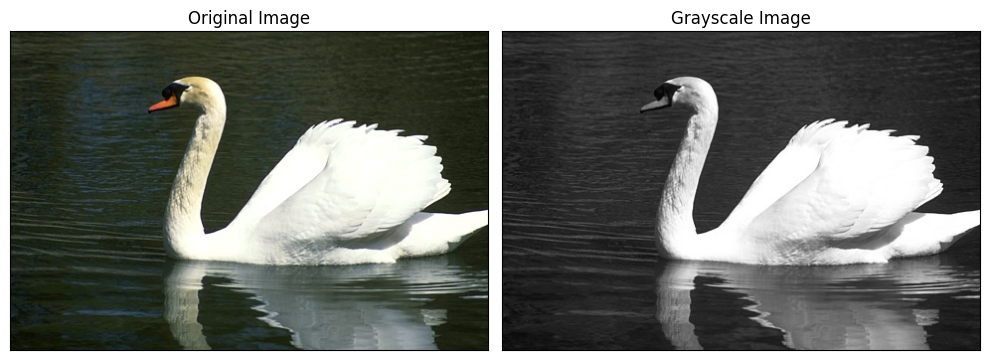

In [3]:
from skimage import io, color
import matplotlib.pyplot as plt

# Load the image
original = io.imread('swan.jpg') 
# Convert the image to grayscale
grayscale = color.rgb2gray(original) 

# Display the original and grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(grayscale, cmap='gray')
plt.title('Grayscale Image')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## Classic Geometric Fuzzy ED

This method is based on [Alshennawy & Aly, 2009]. It consists in mapping every pixel in the image, excluding border ones, with a 3x3 floating mask in order to analyze the surroundings of every single pixel and detect if it can be defined an edge or not.

In [10]:
from ClassicED import GeometricFuzzyED

# Initialize the Classic Geometric Fuzzy Edge Detector
geometric = GeometricFuzzyED()

The fuzzy sets of the system were defined to represent each pixel’s intensity.
The input trapezoidal membership functions are associated with the linguistic variables "black" and "white", hence assigning each pixel a fuzzy degree of membership to both color black (corresponding to a gray intensity of 0) and color white (gray intensity of 1).
The output Gaussian membership function works almost like a delta function: since the non-zero values fall in a very sharp range, it assigns to each pixel in exam a precise fuzzy degree of membership to the linguistic variable "edge", i.e. the probability of being an edge.

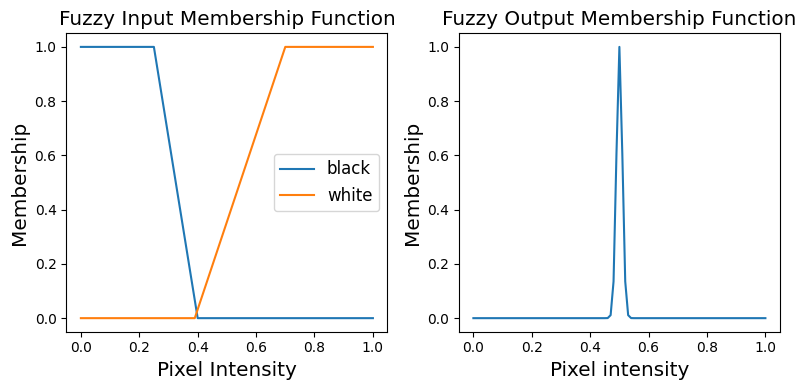

In [11]:
# Plot the membership functions

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].plot(geometric.gray_range, geometric.black_mf, label="black")
ax[0].plot(geometric.gray_range, geometric.white_mf, label="white")
ax[0].set_title("Fuzzy Input Membership Function", fontsize='x-large')
ax[0].set_xlabel("Pixel Intensity", fontsize='x-large')
ax[0].set_ylabel("Membership", fontsize='x-large')
ax[1].plot(geometric.gray_range, geometric.edge_yes)
ax[1].set_title("Fuzzy Output Membership Function", fontsize='x-large')
ax[1].set_xlabel("Pixel intensity", fontsize='x-large')
ax[1].set_ylabel("Membership", fontsize='x-large')
ax[0].legend(loc="best", fontsize='large')
plt.tight_layout()
plt.show()

This method involves an 8-rule fuzzy rule base, corresponding to 8 different neighbours geometries, to compute the edges of the image. 

Geometric Edge Detection (Rows): 100%|██████████| 319/319 [00:16<00:00, 19.09it/s]


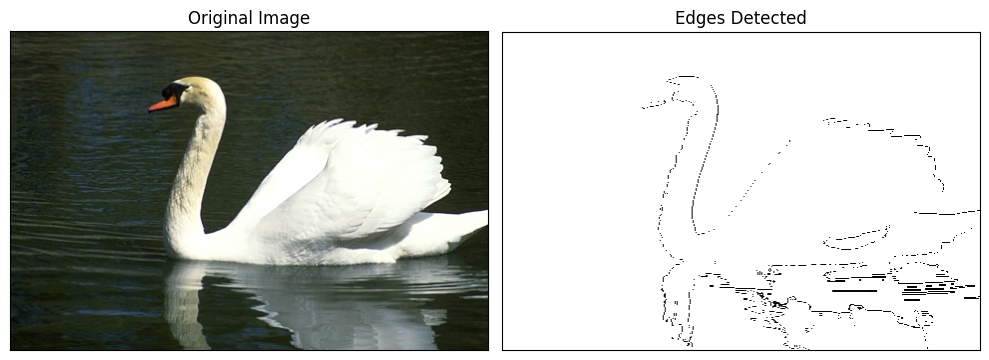

In [12]:
# Detect edges using the detect_edges method
geometric_edges = geometric.detect_edges(grayscale)

# Display the detected edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(geometric_edges, cmap='gray')
plt.title('Edges Detected')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## Classic Gradient Fuzzy ED

This method consists in computing the image gradient along the x-axis and y-axis by convolution with simple filters $[-1, 1]$ and $[-1,1]^T$ in order to detect significant intensity changes in neighbouring pixels, thus representing an edge.

In [13]:
from ClassicED import GradientFuzzyED

# Initialize the Classic Gradient Fuzzy Edge Detector
gradient = GradientFuzzyED()

The input Gaussian membership function is associated with the linguistic variables "zero" and its complement is associated with "one", allowing to appreciate even small intensity differences between neighboring pixels, strongly highlighting the edges with respect to the underlying uniform regions.
The output trapezoidal membership functions are associated with the linguistic variables "black" and "white", therefore assigning each pixel a fuzzy degree of membership to both color black (corresponding to a gray intensity of 0) and color white (gray intensity of 1). In this case black pixels represent the edge of the image.

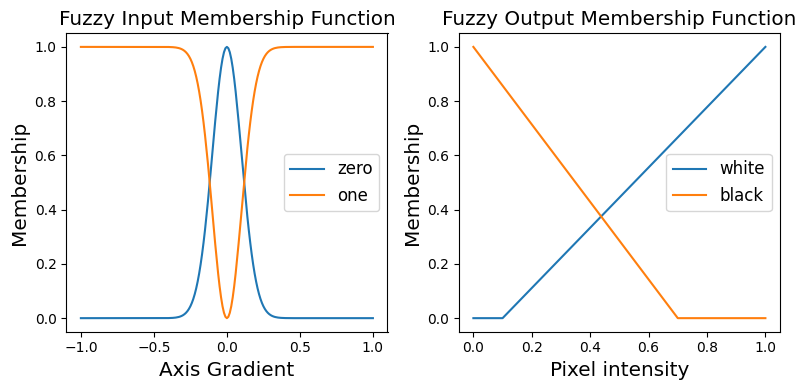

In [14]:
# Plot the membership functions
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].plot(gradient.I_x, gradient.Mx, label="zero")
ax[0].plot(gradient.I_x, 1- gradient.Mx, label="one")
ax[0].set_title("Fuzzy Input Membership Function", fontsize='x-large')
ax[0].set_xlabel("Axis Gradient", fontsize='x-large')
ax[0].set_ylabel("Membership", fontsize='x-large')
ax[0].legend(loc="best", fontsize='large')
ax[1].plot(gradient.x_b, gradient.white, label="white")
ax[1].plot(gradient.x_b, gradient.black, label="black")
ax[1].set_title("Fuzzy Output Membership Function", fontsize='x-large')
ax[1].set_xlabel("Pixel intensity", fontsize='x-large')
ax[1].set_ylabel("Membership", fontsize='x-large')
ax[1].legend(loc="best", fontsize='large')
plt.tight_layout()
plt.show()

In our reasoning a pixel is considered white if it lays in an uniform region, namely when its gradient is zero in both directions. On the contrary, if either direction has a nonzero gradient, then the pixel is an edge. 
This can be translated in 2 fuzzy rules:
- If gradient in x and y are both zero, then the pixel is not an edge (white)
- If one or either gradient in x and y are one, then the pixel is an edge (black)

Gradient Fuzzy Edge Detection (Rows): 100%|██████████| 321/321 [00:00<00:00, 1711.63it/s]


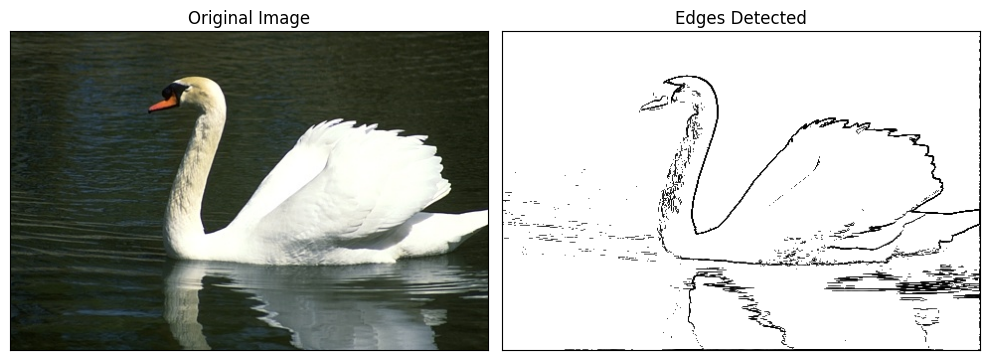

In [15]:
# Detect edges using the detect_edges method
# Note that by default, the method uses a parallelization strategy to speed up the process
# It can be disabled by setting the parameter 'parallel' to False

gradient_edges = gradient.detect_edges(grayscale)

# Display the detected edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(gradient_edges, cmap='gray')
plt.title('Edges Detected')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

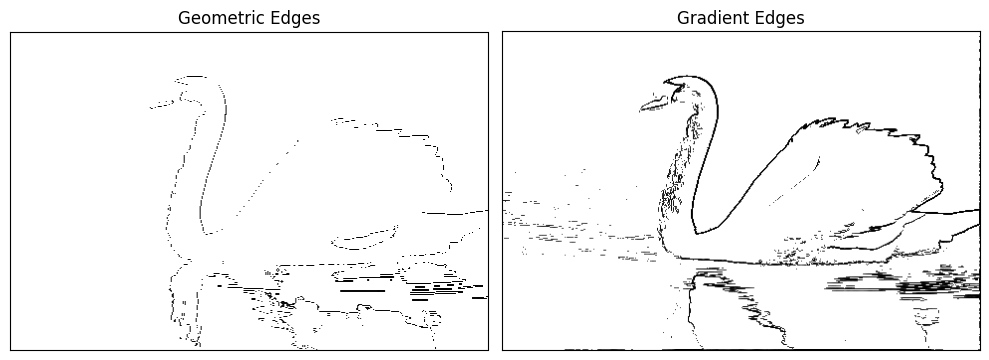

In [16]:
# Display the difference between the two classic fuzzy edge detection methods

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(geometric_edges, cmap='gray')
plt.title('Geometric Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(gradient_edges, cmap='gray')
plt.title('Gradient Edges')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


## Standard QFED

This method exploits the Quantum Fuzzy Inference Engine (QFIE) introduced in [Acampora, Schiattarella & Vitiello, 2023].

QFIE allows us to translate fuzzy AND rules on quantum circuits by means of controlled-NOT quantum gates.

In this sense, we have expanded our Classic Gradient method to 4 fuzzy-rules:
- if Ix is zero AND Iy is zero THEN PI is white
- if Ix is one AND Iy is zero THEN PI is black
- if Ix is zero AND Iy is one THEN PI is black
- if Ix is one AND Iy is one THEN PI is black

where Ix and Iy are the input directional gradients and PI is the output Pixel Intensity.

At first we define the Qiskit backend on which we want to execute our circuit and the number of shots.
In this example we will use the ideal simulator AerSimulator with 1000 circuit shots.

In [2]:
from qiskit_aer import AerSimulator

backend= AerSimulator()
n_shots = 1000

In [7]:
from QuantumED import QFEDStandard

# Initialize the Standard QFED. 
standard = QFEDStandard(backend, n_shots)

The circuit fires our 4 fuzzy rules using as many CNOTs. 

It is composed by 4 qubits: the first two hold the input gradient values, while the last two hold the output values for the edge detection. 

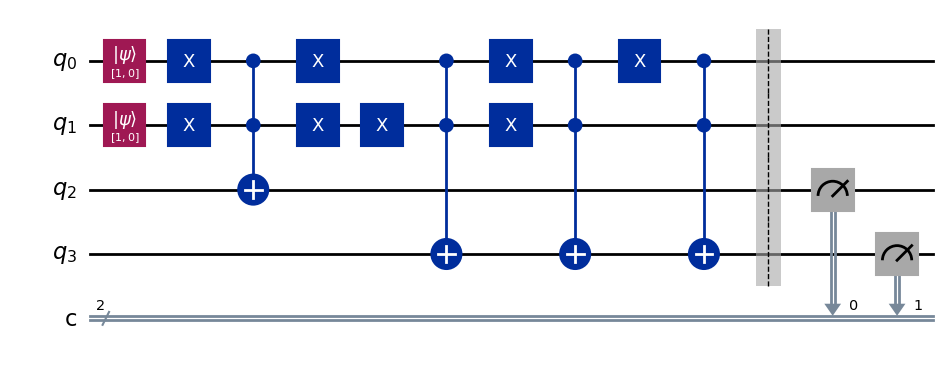

In [8]:
# Define and draw the circuit using two example gradient values 
qc = standard.build_circuit(0, 0)
qc.draw('mpl')

The image edges can be detected by running this circuit on every pixel of the image. 

Quantum Edge Detection: 100%|██████████| 154401/154401 [33:24<00:00, 77.02it/s] 


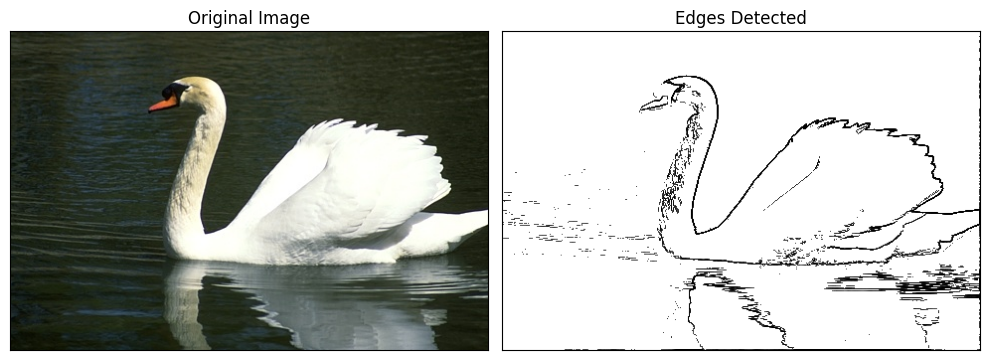

In [9]:
# Detect edges using the detect_edges method
# Note that by default, the method uses a parallelization strategy to speed up the process
# It can be disabled by setting the parameter 'parallel' to False

standard_edges = standard.detect_edges(grayscale)

# Display the detected edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(standard_edges, cmap='gray')
plt.title('Edges Detected')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## Optimized QFED

We also propose an optimized version of this circuit, composed of 3 qubits and 1 classical bit.
The first two qubits hold the input gradient values, while the last one holds the output value for the edge detection.

In [4]:
from QuantumED import QFEDOptimized

# Initialize the Optimized QFED
# This version uses fewer qubits and gates, making it more efficient for edge detection tasks
optimized = QFEDOptimized(backend, n_shots)

The inference process is carried out by a single Toffoli gate and the fuzzified gradient values are initialized using rotation gates.

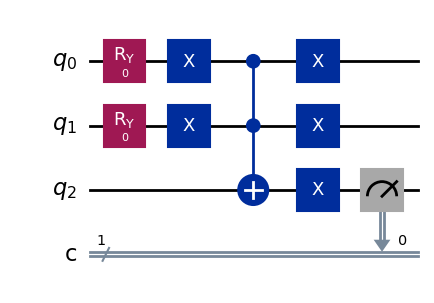

In [17]:
# Define and draw the circuit using two example gradient values 
qc = optimized.build_circuit(0, 0)
qc.draw('mpl')

Likewise, the image edges can be detected by running this circuit on every pixel of the image. 

Quantum Edge Detection: 100%|██████████| 154401/154401 [57:11<00:00, 44.99it/s]  


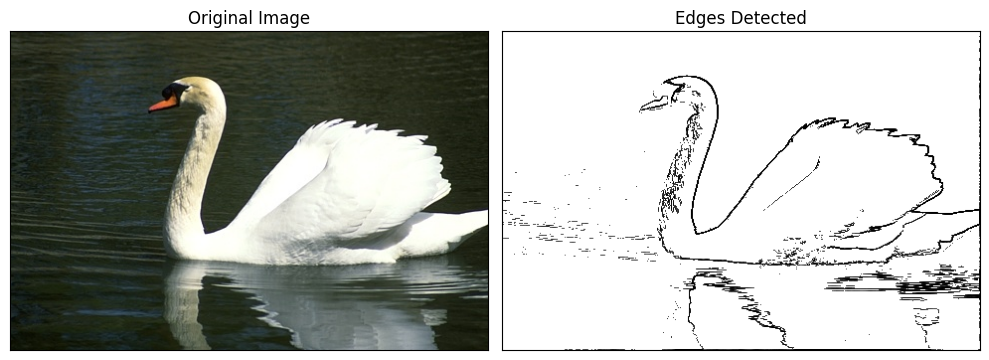

In [5]:
# Detect edges using the detect_edges method
# Note that by default, the method uses a parallelization strategy to speed up the process
# It can be disabled by setting the parameter 'parallel' to False

optimized_edges = optimized.detect_edges(grayscale)

# Display the detected edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(optimized_edges, cmap='gray')
plt.title('Edges Detected')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

The two methods produce identical results.

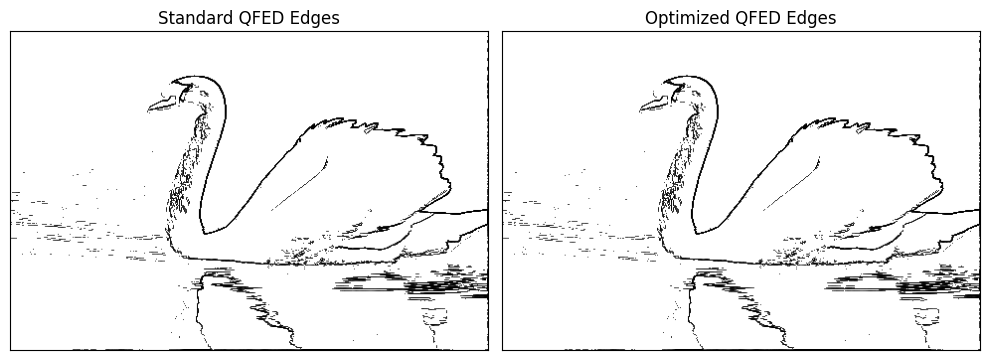

In [18]:
# Display the two methods results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(standard_edges, cmap='gray')
plt.title('Standard QFED Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(optimized_edges, cmap='gray')
plt.title('Optimized QFED Edges')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## Lookup table approach: QFED on a NISQ device.

Considering an input image with resolution $n \times n$, this QFIE-based approach requires the execution of the quantum circuit $n^2$ times, i.e. one execution for each pixel of the image. However, given the challenges associated with accessing
current NISQ devices due to their extensive queue times and limited computational resources, this approach is impractical for ED on real-world images.

As a workaround, we have executed the system giving in input every possible gradient value pair, ranging from -1 to 1, with a step of 0.1, obtaining the related $P_i$. These results are stored in a lookup table so that, given an image,
the edges are then detected by mapping each pixel’s gradient pair to the closest gradient pair in the lookup table and obtaining its intensity value in grayscale.

This results in a hybrid approach, where the construction of the lookup table is carried out by using the quantum algorithm, while the inference from the lookup table is executed classically.

In the end, this solution allowed us to run on real quantum hardware, specifically on *ibmq_sherbrooke*, a 127 qubits NISQ device from IBM Quantum. The number of quantum circuit shots set for both the simulations and the execution on real hardware was 1000.

In addition, lookup tables computed on a classic device, on an ideal quantum simulator and on a noisy quantum simulator (FakeSherbrooke) are available.

In [19]:
from FastED import FastQFED

# Initialize the Fast QFED
# This version uses a lookup table to speed up the edge detection process
# Note that you can choise the lookup table to use by setting the parameter table. 
# Default is "quantum". Choices are "classic", "simulator", "noisysim", and "quantum".
fast = FastQFED(table="quantum")

# Detect edges using the detect_edges method

quantum_edges = fast.detect_edges(grayscale)

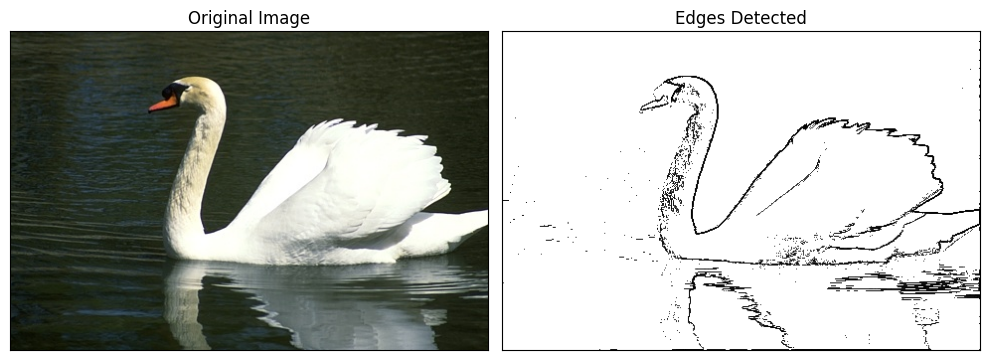

In [20]:
# Display the detected edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(quantum_edges, cmap='gray')
plt.title('Edges Detected')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()